In [ ]:
import pandas as pd

In [574]:
df = pd.read_csv(r'C:\Users\fahad\Human-Body-Measurements-using-Computer-Vision\kaggle_dataset\Body Measurements _ original_CSV.csv')

In [575]:
df = df.drop(['Gender', 'Age'], axis=1)

In [576]:
print(df.columns)

Index(['HeadCircumference', 'ShoulderWidth', 'ChestWidth ', 'Belly ', 'Waist ',
       'Hips ', 'ArmLength ', 'ShoulderToWaist ', 'WaistToKnee ', 'LegLength',
       'TotalHeight'],
      dtype='object')


## Converting to CM

In [577]:
# Create a list of the column names to convert
cols_to_convert = ['HeadCircumference', 'ShoulderWidth', 'ChestWidth ', 'Belly ', 'Waist ',
       'Hips ', 'ArmLength ', 'ShoulderToWaist ', 'WaistToKnee ', 'LegLength',
       'TotalHeight']

# Iterate over each column and convert the values
for col in cols_to_convert:
    df[col] = df[col].apply(lambda x: round(x * 2.54, 1))

In [578]:
# df['NeckCircumference'] = df['TotalHeight'] - (df['ShoulderToWaist '] * 0.5)
# df['WristCircumference'] = (df['TotalHeight'] * 0.107) - 10.49
# df['AnkleCircumference'] = df['TotalHeight'] * 0.055
# df['ThighCircumference'] = df['TotalHeight'] * 0.275


df['NeckCircumference'] = (0.27 * df['ChestWidth ']) + (0.16 * df['TotalHeight'])

df['WristCircumference'] = (0.17 * df['TotalHeight']) + (0.11 * df['ShoulderWidth'])

df['AnkleCircumference'] = (0.25 * df['TotalHeight']) + (0.1 * df['LegLength'])

df['ThighCircumference'] = (0.34 * df['TotalHeight']) - (0.25 * df['LegLength'])

In [579]:
df['wrist'] = (df['WristCircumference'] + 0.4)
df['neck'] = df['TotalHeight'] - (df['NeckCircumference'] * 0.1)
df['thigh'] = df['TotalHeight'] - (df['ThighCircumference'] * 0.24)
df['ankle'] = df['TotalHeight'] - (df['AnkleCircumference'] * 0.19)

In [580]:
df

,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight,NeckCircumference,WristCircumference,AnkleCircumference,ThighCircumference,wrist,neck,thigh,ankle
0,55.9,45.7,50.8,45.7,35.6,55.9,55.9,63.5,63.5,55.9,132.1,34.852,27.484,38.615,30.939,27.884,128.6148,124.67464,124.76315
1,48.3,55.9,43.2,45.7,53.3,63.5,71.1,58.4,63.5,50.8,142.2,34.416,30.323,40.630,35.648,30.723,138.7584,133.64448,134.48030
2,53.3,45.7,40.6,35.6,25.4,38.1,53.3,45.7,35.6,45.7,134.6,32.498,27.909,38.220,34.339,28.309,131.3502,126.35864,127.33820
3,50.8,50.8,45.7,27.9,48.3,35.6,61.0,53.3,50.8,53.3,114.3,30.627,25.019,33.905,25.537,25.419,111.2373,108.17112,107.85805
4,40.6,35.6,45.7,33.0,27.9,76.2,63.5,55.9,81.3,33.0,119.4,31.443,24.214,33.150,32.346,24.614,116.2557,111.63696,113.10150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,55.9,15.2,35.6,63.5,45.7,76.2,53.3,50.8,40.6,83.8,149.9,33.596,27.155,45.855,30.016,27.555,146.5404,142.69616,141.18755
712,53.3,27.9,30.5,55.9,5.1,66.0,53.3,38.1,35.6,63.5,114.3,26.523,22.500,34.925,22.987,22.900,111.6477,108.78312,107.66425
713,50.8,43.2,27.9,55.9,55.9,55.9,43.2,30.5,30.5,55.9,101.6,23.789,22.024,30.990,20.569,22.424,99.2211,96.66344,95.71190
714,50.8,38.1,35.6,63.5,45.7,76.2,53.3,50.8,40.6,83.8,149.9,33.596,29.674,45.855,30.016,30.074,146.5404,142.69616,141.18755


In [581]:
df = df.drop(columns=['HeadCircumference', 'ShoulderToWaist ', 'WaistToKnee ', 'LegLength', 'NeckCircumference', 'WristCircumference', 'AnkleCircumference', 'ThighCircumference'])
df

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle
0,45.7,50.8,45.7,35.6,55.9,55.9,132.1,27.884,128.6148,124.67464,124.76315
1,55.9,43.2,45.7,53.3,63.5,71.1,142.2,30.723,138.7584,133.64448,134.48030
2,45.7,40.6,35.6,25.4,38.1,53.3,134.6,28.309,131.3502,126.35864,127.33820
3,50.8,45.7,27.9,48.3,35.6,61.0,114.3,25.419,111.2373,108.17112,107.85805
4,35.6,45.7,33.0,27.9,76.2,63.5,119.4,24.614,116.2557,111.63696,113.10150
...,...,...,...,...,...,...,...,...,...,...,...
711,15.2,35.6,63.5,45.7,76.2,53.3,149.9,27.555,146.5404,142.69616,141.18755
712,27.9,30.5,55.9,5.1,66.0,53.3,114.3,22.900,111.6477,108.78312,107.66425
713,43.2,27.9,55.9,55.9,55.9,43.2,101.6,22.424,99.2211,96.66344,95.71190
714,38.1,35.6,63.5,45.7,76.2,53.3,149.9,30.074,146.5404,142.69616,141.18755


In [582]:
df.describe()

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,36.364106,37.004050,51.307123,48.932402,49.221229,47.796927,122.225140,25.178325,119.270428,116.341004,115.124458
std,12.097579,13.497851,25.737347,22.277503,22.214911,13.655622,30.880113,5.951933,30.218358,29.174190,29.161431
min,10.200000,15.200000,12.700000,5.100000,17.800000,15.200000,48.300000,10.283000,46.155600,46.338720,45.184950
25%,27.900000,27.900000,38.100000,30.500000,30.500000,40.600000,101.600000,21.750250,99.476925,98.377940,95.893350
50%,35.600000,33.000000,50.800000,50.800000,45.700000,48.300000,121.900000,25.023500,118.715700,115.075960,114.661950
75%,45.700000,43.200000,58.400000,58.400000,61.000000,55.900000,139.700000,28.870000,136.144500,132.874980,131.472050
max,221.000000,96.500000,541.000000,231.100000,160.000000,167.600000,226.100000,44.425000,220.357500,214.052240,213.332950


## Normalizing the Dataset

In [583]:
from sklearn.preprocessing import StandardScaler

# perform Gaussian normalization on the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# convert the scaled data back to a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

## Removing Outliers

In [584]:
from scipy import stats

# assume 'df' is your dataframe
z = np.abs(stats.zscore(scaled_df))
print(z)

[[0.77225534 1.02279943 0.21801169 ... 0.30944448 0.28585067 0.33075984]
 [1.61598864 0.45935321 0.21801169 ... 0.64535588 0.59352366 0.66421202]
 [0.77225534 0.2665953  0.61071186 ... 0.40002889 0.34361327 0.41912485]
 ...
 [0.56545796 0.67495299 0.17857659 ... 0.66394552 0.67495686 0.66615825]
 [0.14359132 0.104093   0.47407375 ... 0.90306148 0.90400384 0.89437695]
 [0.14359132 0.86029714 0.01971755 ... 0.90936192 0.93001238 0.90961542]]


In [585]:
threshold = 3
outliers = np.where(z > threshold)
scaled_df = scaled_df.drop(scaled_df.index[outliers[0]])
scaled_df

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle
0,0.772255,1.022799,-0.218012,-0.598888,0.300854,0.593802,0.320004,0.454905,0.309444,0.285851,0.330760
1,1.615989,0.459353,-0.218012,0.196191,0.643205,1.707675,0.647304,0.932227,0.645356,0.593524,0.664212
2,0.772255,0.266595,-0.610712,-1.057069,-0.500970,0.403271,0.401019,0.526361,0.400029,0.343613,0.419125
3,1.194122,0.644697,-0.910097,-0.028407,-0.613586,0.967536,-0.256822,0.040465,-0.266022,-0.280234,-0.249353
4,-0.063206,0.644697,-0.711803,-0.944769,1.215293,1.150738,-0.091551,-0.094880,-0.099835,-0.161353,-0.069419
...,...,...,...,...,...,...,...,...,...,...,...
711,-1.750673,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.399591,0.903061,0.904004,0.894377
712,-0.700142,-0.482195,0.178577,-1.968939,0.755821,0.403271,-0.256822,-0.383055,-0.252431,-0.259242,-0.256003
713,0.565458,-0.674953,0.178577,0.312982,0.300854,-0.336868,-0.668377,-0.463085,-0.663946,-0.674957,-0.666158
714,0.143591,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.823110,0.903061,0.904004,0.894377


In [586]:
# create the size column based on the scaled columns
scaled_df['size'] = (scaled_df['ShoulderWidth'] + scaled_df['ChestWidth '] + scaled_df['Belly '] + scaled_df['Waist '] + scaled_df['Hips '] + scaled_df['ArmLength '] + scaled_df['TotalHeight'] + scaled_df['wrist'] + scaled_df['neck'] + scaled_df['thigh'] + scaled_df['ankle'])/11

# convert the size column to label form
scaled_df['size'] = pd.cut(scaled_df['size'], bins=[-float('inf'), -1.5, -0.5, 0.5, 1.5, float('inf')], labels=[1, 2, 3, 4, 5])


In [587]:
scaled_df

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle,size
0,0.772255,1.022799,-0.218012,-0.598888,0.300854,0.593802,0.320004,0.454905,0.309444,0.285851,0.330760,3
1,1.615989,0.459353,-0.218012,0.196191,0.643205,1.707675,0.647304,0.932227,0.645356,0.593524,0.664212,4
2,0.772255,0.266595,-0.610712,-1.057069,-0.500970,0.403271,0.401019,0.526361,0.400029,0.343613,0.419125,3
3,1.194122,0.644697,-0.910097,-0.028407,-0.613586,0.967536,-0.256822,0.040465,-0.266022,-0.280234,-0.249353,3
4,-0.063206,0.644697,-0.711803,-0.944769,1.215293,1.150738,-0.091551,-0.094880,-0.099835,-0.161353,-0.069419,3
...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1.750673,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.399591,0.903061,0.904004,0.894377,3
712,-0.700142,-0.482195,0.178577,-1.968939,0.755821,0.403271,-0.256822,-0.383055,-0.252431,-0.259242,-0.256003,3
713,0.565458,-0.674953,0.178577,0.312982,0.300854,-0.336868,-0.668377,-0.463085,-0.663946,-0.674957,-0.666158,3
714,0.143591,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.823110,0.903061,0.904004,0.894377,4


In [588]:
one_hot_sizes = pd.get_dummies(scaled_df["size"], prefix="size")

# Concatenate the one-hot encoded size column with the original DataFrame
df = pd.concat([scaled_df, one_hot_sizes], axis=1)

# Calculate the Pearson correlation coefficient between the features and the one-hot encoded size column
corr = df.corr(method="pearson")

# Print the correlation matrix
print(corr)

               ShoulderWidth  ChestWidth     Belly     Waist      Hips   \
ShoulderWidth       1.000000     0.413824  0.042287  0.296059  0.346979   
ChestWidth          0.413824     1.000000  0.187449  0.279287  0.417147   
Belly               0.042287     0.187449  1.000000  0.572574  0.559272   
Waist               0.296059     0.279287  0.572574  1.000000  0.718100   
Hips                0.346979     0.417147  0.559272  0.718100  1.000000   
ArmLength           0.511620     0.287911  0.230621  0.265802  0.333819   
TotalHeight         0.578742     0.379045  0.336832  0.390286  0.399019   
wrist               0.699266     0.411698  0.303378  0.398947  0.416376   
neck                0.576447     0.369062  0.336118  0.388736  0.395903   
thigh               0.580505     0.380650  0.338356  0.392116  0.400499   
ankle               0.578049     0.378448  0.336271  0.389616  0.398458   
size_1             -0.307053    -0.076927 -0.239086 -0.191065 -0.157003   
size_2             -0.457

In [589]:
df

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle,size,size_1,size_2,size_3,size_4,size_5
0,0.772255,1.022799,-0.218012,-0.598888,0.300854,0.593802,0.320004,0.454905,0.309444,0.285851,0.330760,3,0,0,1,0,0
1,1.615989,0.459353,-0.218012,0.196191,0.643205,1.707675,0.647304,0.932227,0.645356,0.593524,0.664212,4,0,0,0,1,0
2,0.772255,0.266595,-0.610712,-1.057069,-0.500970,0.403271,0.401019,0.526361,0.400029,0.343613,0.419125,3,0,0,1,0,0
3,1.194122,0.644697,-0.910097,-0.028407,-0.613586,0.967536,-0.256822,0.040465,-0.266022,-0.280234,-0.249353,3,0,0,1,0,0
4,-0.063206,0.644697,-0.711803,-0.944769,1.215293,1.150738,-0.091551,-0.094880,-0.099835,-0.161353,-0.069419,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1.750673,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.399591,0.903061,0.904004,0.894377,3,0,0,1,0,0
712,-0.700142,-0.482195,0.178577,-1.968939,0.755821,0.403271,-0.256822,-0.383055,-0.252431,-0.259242,-0.256003,3,0,0,1,0,0
713,0.565458,-0.674953,0.178577,0.312982,0.300854,-0.336868,-0.668377,-0.463085,-0.663946,-0.674957,-0.666158,3,0,0,1,0,0
714,0.143591,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.823110,0.903061,0.904004,0.894377,4,0,0,0,1,0


In [590]:
df = df.drop('size', axis=1)
df

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle,size_1,size_2,size_3,size_4,size_5
0,0.772255,1.022799,-0.218012,-0.598888,0.300854,0.593802,0.320004,0.454905,0.309444,0.285851,0.330760,0,0,1,0,0
1,1.615989,0.459353,-0.218012,0.196191,0.643205,1.707675,0.647304,0.932227,0.645356,0.593524,0.664212,0,0,0,1,0
2,0.772255,0.266595,-0.610712,-1.057069,-0.500970,0.403271,0.401019,0.526361,0.400029,0.343613,0.419125,0,0,1,0,0
3,1.194122,0.644697,-0.910097,-0.028407,-0.613586,0.967536,-0.256822,0.040465,-0.266022,-0.280234,-0.249353,0,0,1,0,0
4,-0.063206,0.644697,-0.711803,-0.944769,1.215293,1.150738,-0.091551,-0.094880,-0.099835,-0.161353,-0.069419,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1.750673,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.399591,0.903061,0.904004,0.894377,0,0,1,0,0
712,-0.700142,-0.482195,0.178577,-1.968939,0.755821,0.403271,-0.256822,-0.383055,-0.252431,-0.259242,-0.256003,0,0,1,0,0
713,0.565458,-0.674953,0.178577,0.312982,0.300854,-0.336868,-0.668377,-0.463085,-0.663946,-0.674957,-0.666158,0,0,1,0,0
714,0.143591,-0.104093,0.474074,-0.145199,1.215293,0.403271,0.896830,0.823110,0.903061,0.904004,0.894377,0,0,0,1,0


## Correlation Matrix

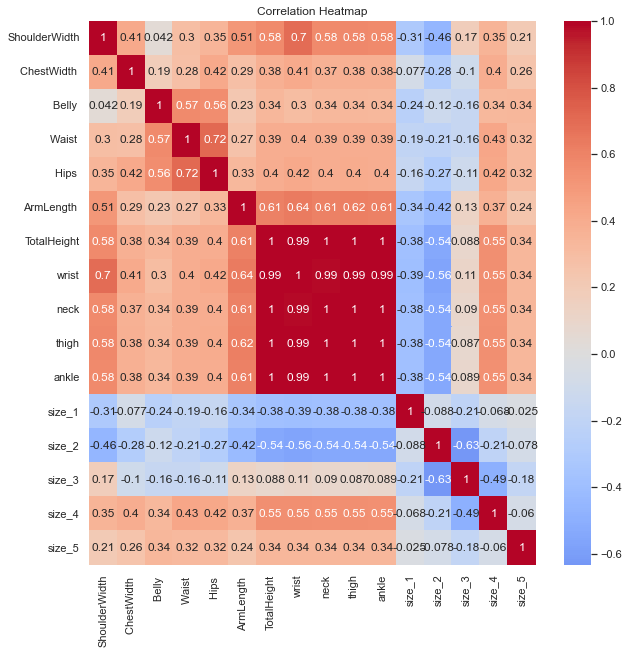

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Create a correlation matrix
corr_matrix = df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Heatmap')

plt.show()


In [592]:
df.describe()

,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,TotalHeight,wrist,neck,thigh,ankle,size_1,size_2,size_3,size_4,size_5
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,-0.058666,-0.063323,-0.066863,-0.092075,-0.072379,-0.074629,-0.058081,-0.064344,-0.057640,-0.058256,-0.058014,0.027737,0.213139,0.597080,0.140146,0.021898
std,0.807996,0.903217,0.646635,0.837587,0.875674,0.828950,0.935346,0.941130,0.936461,0.935329,0.935381,0.164339,0.409824,0.490843,0.347392,0.146457
min,-2.164267,-1.616501,-1.501091,-1.968939,-1.415409,-2.388739,-2.395614,-2.504352,-2.421241,-2.401137,-2.400033,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.700142,-0.674953,-0.513509,-0.827978,-0.843322,-0.527399,-0.668377,-0.626507,-0.663946,-0.669812,-0.664463,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.063206,-0.296851,-0.019718,-0.028407,-0.158618,0.036866,-0.091551,-0.071510,-0.083919,-0.088086,-0.087676,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.565458,0.459353,0.275780,0.425282,0.530590,0.403271,0.485274,0.454905,0.489222,0.483144,0.480897,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.873317,2.905896,2.647533,2.936294,2.931556,1.898206,2.789337,2.680948,2.774328,2.785492,2.791624,1.000000,1.000000,1.000000,1.000000,1.000000


In [593]:
X = df.drop(['size_1', 'size_2', 'size_3', 'size_4', 'size_5'], axis=1)
y = df[['size_1', 'size_2', 'size_3', 'size_4', 'size_5']].idxmax(axis=1)

In [594]:
y = pd.Categorical(y).codes
y

array([2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 0, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 1, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 3, 0, 1, 3, 2,
       1, 3, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 2, 3, 4, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,

## Feature Selection

In [595]:
# from sklearn.feature_selection import SelectKBest, f_classif

# def feature_selection(X, y):
#     # compute Pearson correlation
#     all_cols = list(X.columns) + list(y.columns)
#     all_data = pd.concat([X, y], axis=1)
#     corr_matrix = all_data[all_cols].corr().values
#     corr_with_output = corr_matrix[:-5, -5:]

#     # count number of features with correlation above a threshold
#     threshold = 0.5
#     num_features = np.sum(np.abs(corr_with_output) > threshold)

#     # select k best features
#     selector = SelectKBest(f_classif, k=num_features)
#     selector.fit(X, y)
#     X_new = selector.transform(X)
#     mask = selector.get_support()
#     selected_features = X.columns[mask]
#     return X_new, selected_features

# X, selected_features = feature_selection(X,y)

## Splitting the Dataset

In [596]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [603]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the classifiers and their parameter grids for grid search
gnb = GaussianNB()

rfc = RandomForestClassifier()
rfc_params = {'clf__n_estimators': [100, 200, 300], 'clf__criterion': ['gini', 'entropy']}

knn = KNeighborsClassifier()
knn_params = {'clf__n_neighbors': [3, 5, 7]}

svc = SVC(gamma='auto')
svc_params = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}

gbc = GradientBoostingClassifier()
gbc_params = {'clf__n_estimators': [100, 200, 300], 'clf__learning_rate': [0.01, 0.1, 1], 'clf__max_depth': [None, 10, 20]}

# Create a list of classifiers and their parameter grids
classifiers = [(gbc, gbc_params), (gnb, {}), (svc, svc_params), (rfc, rfc_params), (knn, knn_params)]

# Define the pipeline with all the preprocessing steps
pipeline_steps = [('imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler()),
                  ('clf', None)]
pipeline = Pipeline(pipeline_steps)

# Loop through the classifiers and their parameter grids
best_accuracy = 0.0
best_model = None

for clf, params in classifiers:
    pipeline_steps = [('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler()),
                          ('clf', clf)]
    pipeline = Pipeline(pipeline_steps)
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {clf.__class__.__name__}: {grid_search.best_params_}")
    train_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test)
    print(f"Train score for {clf.__class__.__name__}: {train_score}")
    print(f"Test score for {clf.__class__.__name__}: {test_score}")
    if test_score > best_accuracy:
        best_accuracy = test_score
        best_model = grid_search.best_estimator_

print(f"\nBest model: {best_model.named_steps['clf'].__class__.__name__}, Accuracy: {best_accuracy}")

C:\Users\fahad\anaconda3\envs\HMS\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters for GaussianNB: {}
Train score for GaussianNB: 0.8959854014598541
Test score for GaussianNB: 0.8321167883211679


C:\Users\fahad\anaconda3\envs\HMS\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters for SVC: {'clf__C': 10, 'clf__kernel': 'linear'}
Train score for SVC: 0.9708029197080292
Test score for SVC: 0.9927007299270073
Best parameters for RandomForestClassifier: {'clf__criterion': 'entropy', 'clf__n_estimators': 300}
Train score for RandomForestClassifier: 0.9251824817518248
Test score for RandomForestClassifier: 0.9343065693430657
Best parameters for KNeighborsClassifier: {'clf__n_neighbors': 5}
Train score for KNeighborsClassifier: 0.9197080291970803
Test score for KNeighborsClassifier: 0.9197080291970803

Best model: SVC, Accuracy: 0.9927007299270073


C:\Users\fahad\anaconda3\envs\HMS\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [621]:
import joblib

joblib.dump(best_model, "./kaggle_dataset/human_size_prediction_model.pkl")

# Load the saved best model
best_model = joblib.load("./kaggle_dataset/human_size_prediction_model.pkl")

In [656]:
input_data = np.array([[49.48, 30, 50, 30, 42, 42, 130, 25, 28, 13, 11]])

# Create a pipeline that applies StandardScaler to input data and makes predictions with the best model
def predict_pipeline(input_data):
    # Normalize input data
    normalized_input_data = scaler.transform(input_data.reshape(1, -1))
    # Make predictions with the trained model using the normalized input data
    predictions = best_model.predict(normalized_input_data)
    return predictions


In [657]:
predict_pipeline(input_data)

array([0], dtype=int8)